In [1]:
from SpectraHitran.SpectraGenerator.spectragenerator import SpectraGenerator
from SpectraHitran.SpectraProcessing.spectraprocessing import branchClassification, plotSpectrum, spectrogramFromSpectra
from SpectraHitran.SpectraFit.spectrafit import filterLine,singleLineFit, multipleLineFit

import numpy as np
from scipy.signal import spectrogram
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

HAPI version: 1.2.2.3
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2021 are now available in HAPI code

           MIT license: Copyright 2021 HITRAN team, see more at http://hitran.org. 

           If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005

           ATTENTION: This is the core version of the HITRAN Application Programming Interface.
                      For more efficient implementation of the absorption coefficient routine, 
                      as well as for new profiles, parameters and other functional,
      

# Simulando espectros e processando espectros

Inicializando
Base de dados hitran já existe

Data is fetched from http://hitran.org

BEGIN DOWNLOAD: HCl
  65536 bytes written to ./HCl.data
  65536 bytes written to ./HCl.data
Header written to ./HCl.header
END DOWNLOAD
                     Lines parsed: 757
PROCESSED
{'air': 0, 'self': 1}
0.977394 seconds elapsed for abscoef; nlines = 757


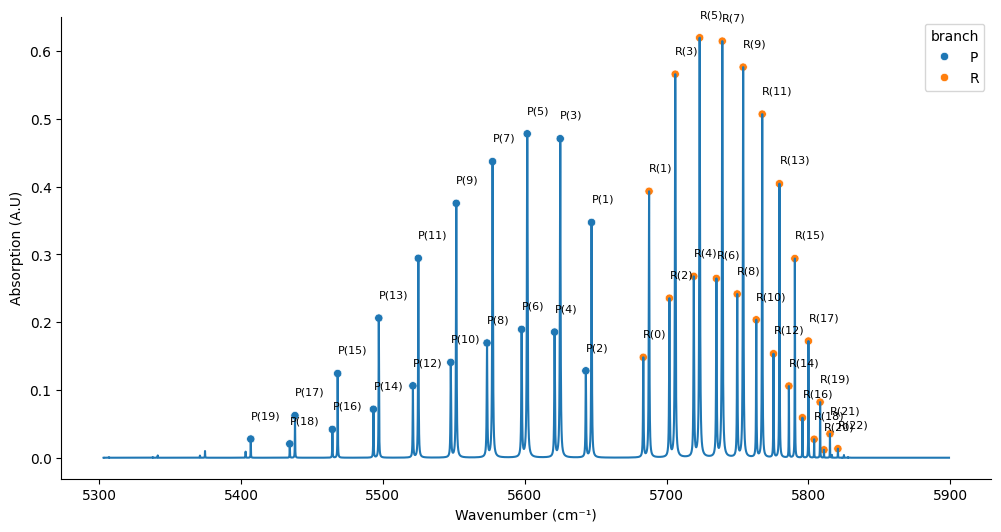

In [16]:
s = SpectraGenerator()

s.downloadMolecule('HCl', (52,53), (5300,5900))

pressure = 1 #atm
temperature = 273 # Kelvin

optical_length = 2 #cm

#Simulando o espectro
s.simulateSpectra('HCl',{'air':0, 'self':1}, {'l':optical_length,'p':pressure,'T':temperature},step=0.01)


# Organizando as linhas
lines = branchClassification(s.spectra, findPeaksParams={'height': 0.01, 'width': 1, 'distance': None},thresoldBranch=5665)

lines['pressure'] = pressure
lines['temperature'] = temperature

# Realizando o fit das linhas pelo perfil de Voigt

plotSpectrum(s.spectra,lines)

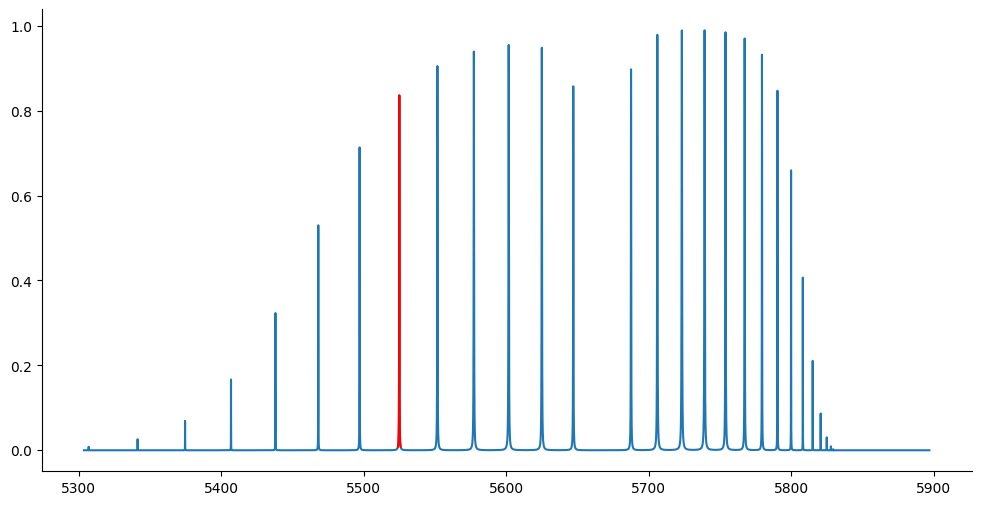

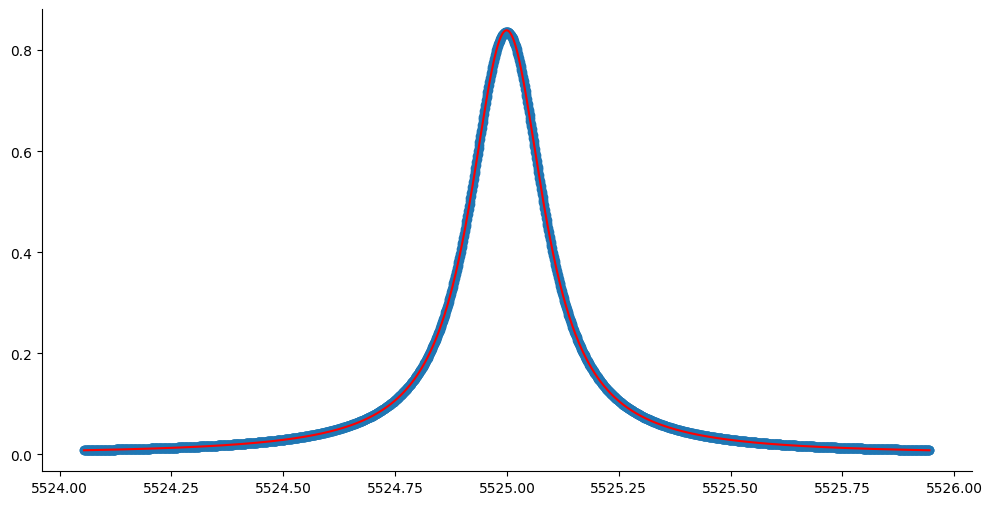

In [3]:
x,y = filterLine(s.spectra,lines.loc[5,'wavenumber'],lines.loc[5,'absorption'],0.01)

plt.plot(s.spectra['wavenumbers'],s.spectra['absorption'])
plt.plot(x,y,c='red')
plt.show()


chute= 8e-3
final, result, params, successful = singleLineFit(y, x, lines.loc[5,'wavenumber'],chute, chute, vgamma=True, vsigma=True)

plt.scatter(x=x,y=y)
plt.plot(x,final,c='red')
plt.show()
result

{'air': 0, 'self': 1}
0.978995 seconds elapsed for abscoef; nlines = 757


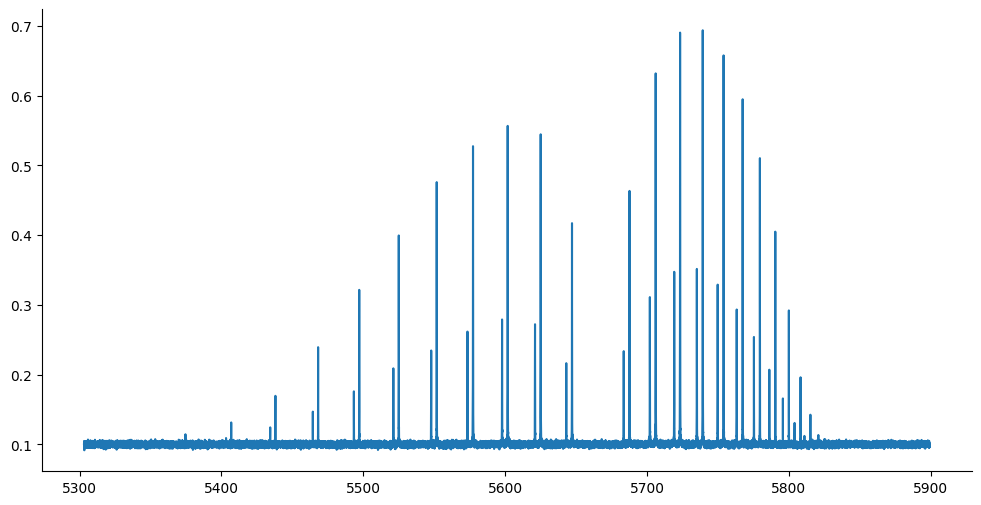

In [34]:
pressure = 0.200 #atm
temperature = 293 # Kelvin

optical_length = 2 #cm

#Simulando o espectro
s.simulateSpectra('HCl',{'air':0, 'self':1}, {'l':optical_length,'p':pressure,'T':temperature},step=0.01)
s.spectra['absorption'] = s.spectra['absorption'] + np.random.normal(0.1,0.002, len(s.spectra['absorption']))
plt.plot(s.spectra['wavenumbers'],s.spectra['absorption'])

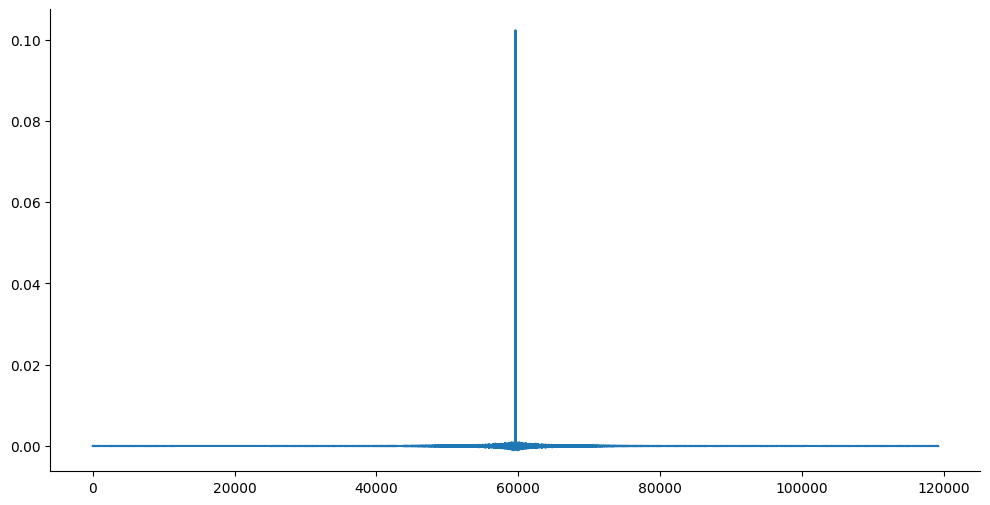

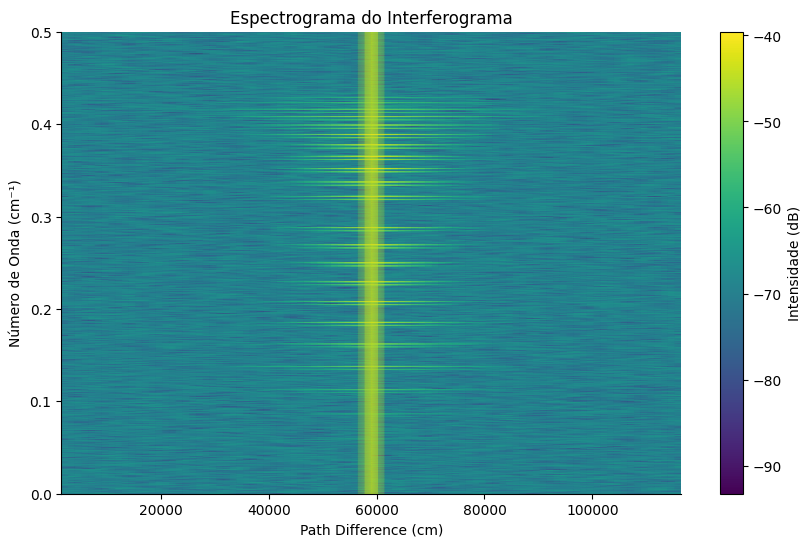

In [35]:
f, t, spec, interferogram = spectrogramFromSpectra(s.spectra)

plt.plot(interferogram)
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, spec, shading='gouraud', cmap='viridis')
plt.colorbar(label='Intensidade (dB)')
plt.xlabel('Path Difference (cm)')
plt.ylabel('Número de Onda (cm⁻¹)')
plt.title('Espectrograma do Interferograma')
plt.show()

In [7]:
spectrogram(s.spectra)

AttributeError: 'dict' object has no attribute 'shape'

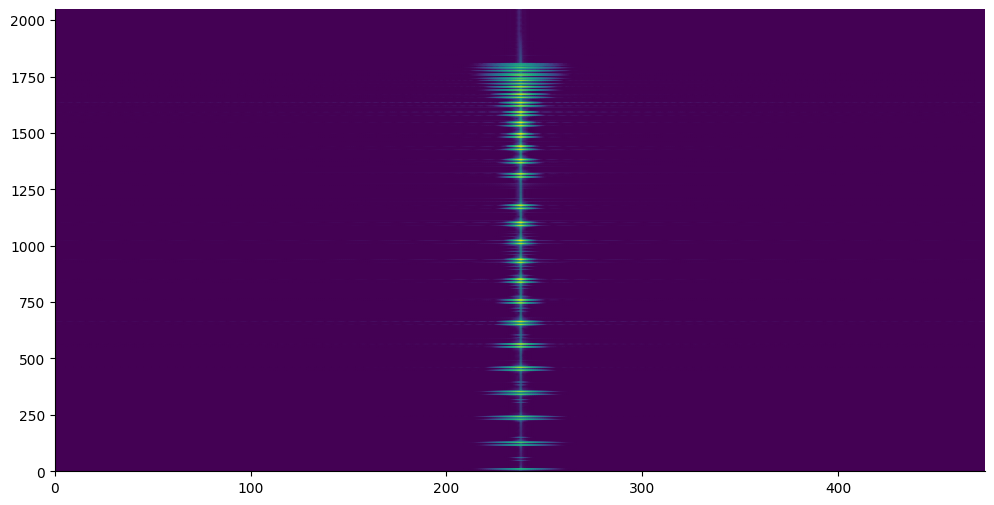

In [160]:
spec = np.load('../spectrograms/train/95_369.4063481437874_0.49621179131407506.npz')

plt.pcolormesh(spec['a'], shading='gouraud', cmap='viridis')

In [8]:
arqs = os.listdir('../database/lines/valid')

data = pd.DataFrame()
for arq in arqs:
    data = pd.concat([data,pd.read_csv("../database/lines/valid/"+arq)])

In [9]:
data = data.drop(columns=['Unnamed: 0'])

In [10]:
data

,wavenumber,absorption,branch,j,m,pressure,temperature,evals,npoints,r2,...,center,center_std,sigma,sigma_stderr,gamma,gamma_stderr,fwhm,fwhm_stderr,height,height_stderr
0,5341.318568,0.012326,P,23,-23,0.475729,307.919068,41,73,1.000000,...,5341.321521,0.000001,4.726090e-03,0.000007,0.035994,0.000002,0.073789,0.000003,0.012403,3.055414e-07
1,5371.058568,0.010224,P,22,-22,0.475729,307.919068,46,84,0.999999,...,5371.060088,0.000010,4.173387e-03,0.000094,0.040800,0.000022,0.082851,0.000029,0.010240,2.380206e-06
2,5374.628568,0.031594,P,21,-21,0.475729,307.919068,36,81,1.000000,...,5374.629172,0.000001,4.748642e-03,0.000010,0.040788,0.000003,0.083189,0.000004,0.031601,9.117707e-07
3,5403.248568,0.023800,P,20,-20,0.475729,307.919068,36,93,0.999998,...,5403.253111,0.000012,3.976288e-03,0.000136,0.045295,0.000028,0.091618,0.000036,0.024039,6.306564e-06
4,5406.878568,0.073659,P,19,-19,0.475729,307.919068,43,91,1.000000,...,5406.878679,0.000002,4.784580e-03,0.000015,0.045447,0.000004,0.092369,0.000005,0.073660,2.437596e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,5815.148568,0.128964,R,21,22,0.209955,336.878988,31,33,1.000000,...,5815.149919,0.000006,5.493588e-03,0.000011,0.015427,0.000008,0.035821,0.000007,0.129649,1.861332e-05
45,5816.538568,0.018047,R,22,23,0.209955,336.878988,51,33,0.999990,...,5816.542628,0.000037,5.069991e-03,0.000073,0.014395,0.000049,0.033337,0.000046,0.019010,1.802292e-05
46,5820.748568,0.057067,R,23,24,0.209955,336.878988,78,33,0.974830,...,5820.752765,0.001866,1.418553e-07,173.071507,0.019994,0.002750,0.039987,0.005501,0.056296,2.897975e-01
47,5820.808568,0.010795,R,24,25,0.209955,336.878988,45,75,0.984473,...,5820.752550,0.001003,1.962823e-07,52.094177,0.018274,0.001384,0.036549,0.002768,0.058840,1.820689e-01


In [11]:
data.to_csv('../database/lines/lines_train.csv', index=None)

In [3]:
espectros = os.listdir('../database/real_spectras/train')

In [12]:
name = espectros[0]

temp = float(name.split('_')[2].split('c')[0])

press =   float(name.split('_')[3].split('mbar')[0])

name, temp, press

('hcl_20_42c_218mbar.csv', 42.0, 218.0)